# Created a Random_Forest classifier model to Predict the Attirition happens in company to help HR

### Employee Attrition Data

### Prepare a model for the HR department to predict the Attrition and give the insights from the data
### about the important factors associated with the attrition so that HR can take the corrective or
### previntive measures to stop or control the attrition.

In [53]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

hr_data = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [54]:
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## About the data


In [55]:
# The data contains, 2940 rows and  35 columns Our Target variable is Attrition ---- Yes or No
# First we need to visualize the data and undersand which affects the people to leave the Job

In [56]:
column_names = hr_data.columns
column_names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [57]:
names = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

dx = ['Yes','No']

In [58]:
# Dropping these columns as it contains same value for all 
hr_data = hr_data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [59]:
# Changed "EmployeeNumber" as index
hr_data.set_index(['EmployeeNumber'], inplace = True) 

In [60]:
# Converted "yes" and "no" to 1 and 0 for Attrition
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes':1, 'No':0})  

# Similarly converted "Overtime" as 1 and 0
hr_data['OverTime'] = hr_data['OverTime'].map({'Yes':1, 'No':0}) 

In [61]:
hr_data['Attrition']

EmployeeNumber
1       1
2       0
3       1
4       0
5       0
       ..
2936    0
2937    0
2938    0
2939    0
2940    0
Name: Attrition, Length: 2940, dtype: int64

In [62]:
# Checking for How many null values are present in our data?
hr_data.apply(lambda x: x.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [63]:
print("Here's the dimensions of our data frame:\n", hr_data.shape)
print("Here's the data types of our columns:\n",hr_data.dtypes)

Here's the dimensions of our data frame:
 (2940, 31)
Here's the data types of our columns:
 Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int6

In [64]:
hr_data       

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
2937,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
2938,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3


In [65]:
hr_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,0.367800,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,0.450530,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [66]:
hr_data.Attrition.value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

## Graph for Attrition

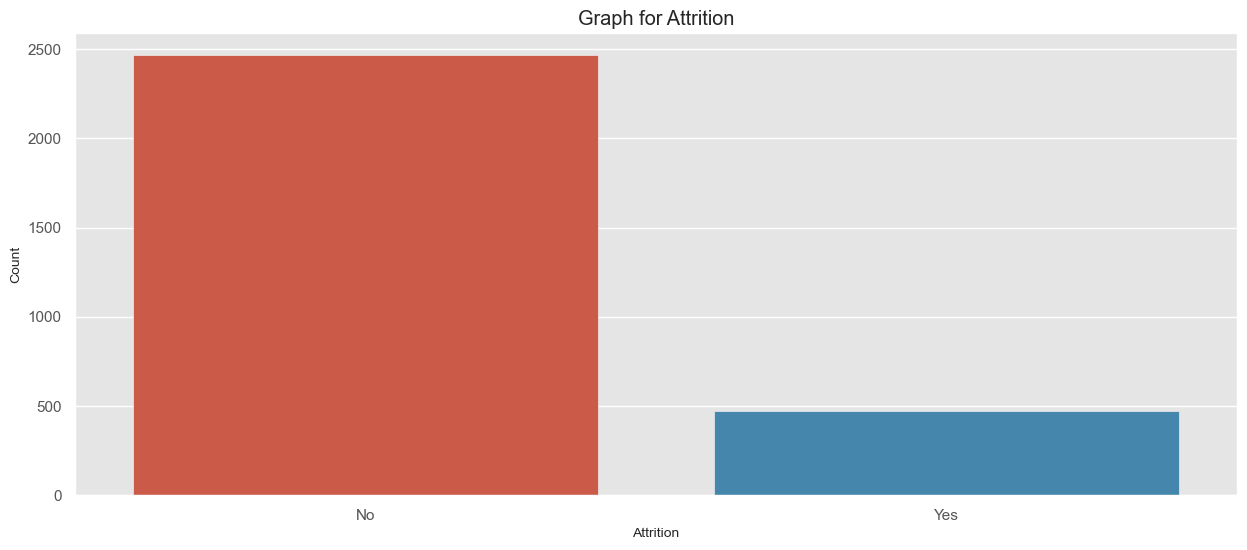

In [67]:
# Plotting Attrition No--0 and Yes---1
#0----2466
#1----474
plt.figure(figsize=(15, 6))
sns.countplot(data=hr_data, x='Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Graph for Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [68]:
# We need to know the counts of the Attirition 1 with respect to age 
# Similarly for No
attrition_age_no = hr_data[hr_data['Attrition'] == 0]['Age']
attrition_age_Yes = hr_data[hr_data['Attrition'] == 1]['Age']

In [69]:
print(len(attrition_age_no))
print(len(attrition_age_Yes))

2466
474


## Plotting Attirition (No) vs age

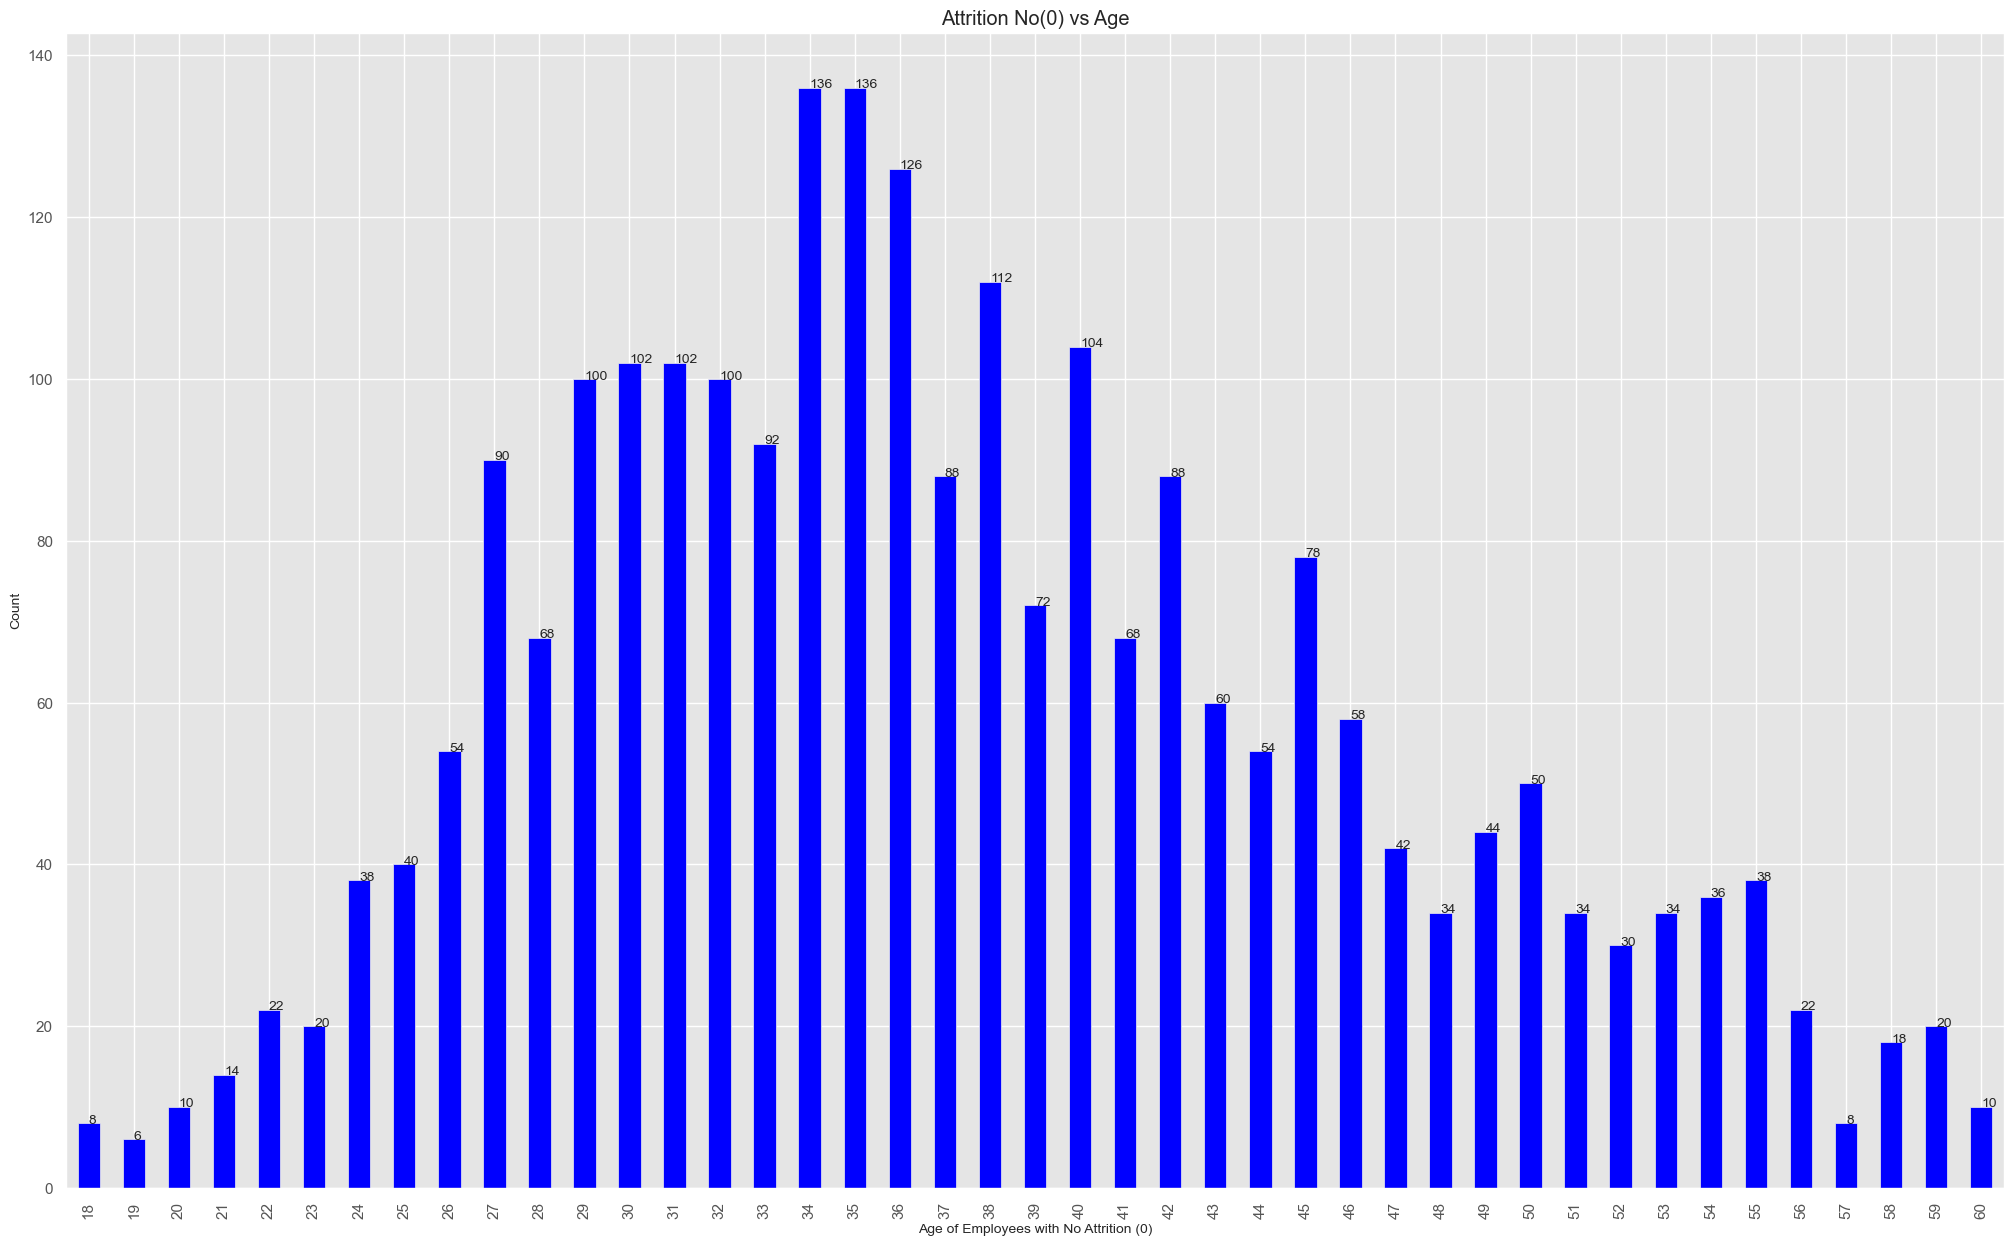

In [70]:
# Plotting Attirition No vs age

age_counts = attrition_age_no.value_counts().sort_index()

plt.figure(figsize=(25, 15))
ax = age_counts.plot(kind='bar',color='blue')
plt.xlabel('Age of Employees with No Attrition (0)')
plt.ylabel('Count')
plt.title('Attrition No(0) vs Age')

for i, count in enumerate(age_counts):
    plt.text(i, count, str(count))
    
plt.show()

## Plotting Attirition (Yes) vs Age

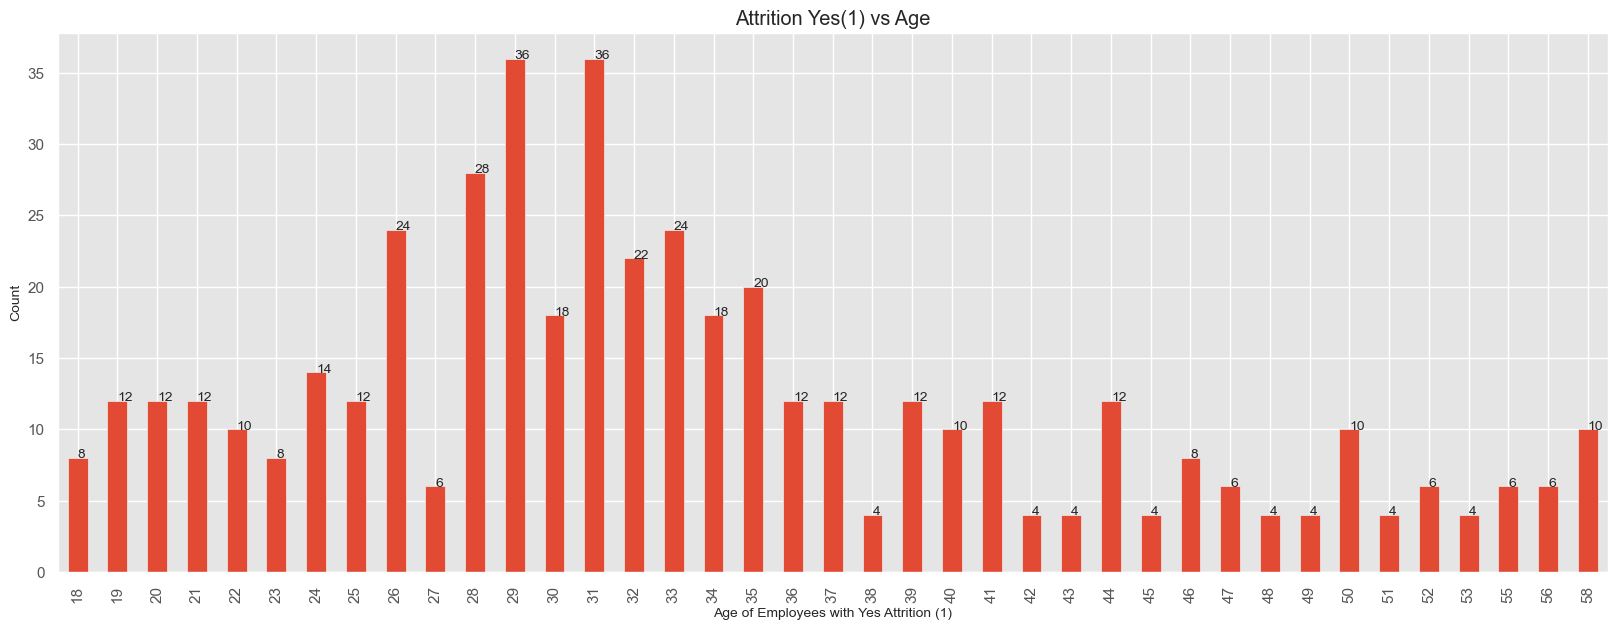

In [71]:
# Plotting Attirition Yes vs Age
age_counts = attrition_age_Yes.value_counts().sort_index()


plt.figure(figsize=(20, 7))
ax = age_counts.plot(kind='bar')
plt.xlabel('Age of Employees with Yes Attrition (1)')
plt.ylabel('Count')
plt.title('Attrition Yes(1) vs Age')

for i, count in enumerate(age_counts):
    plt.text(i, count, str(count))
    
plt.show()

## Age vs both Attrition Yes and No

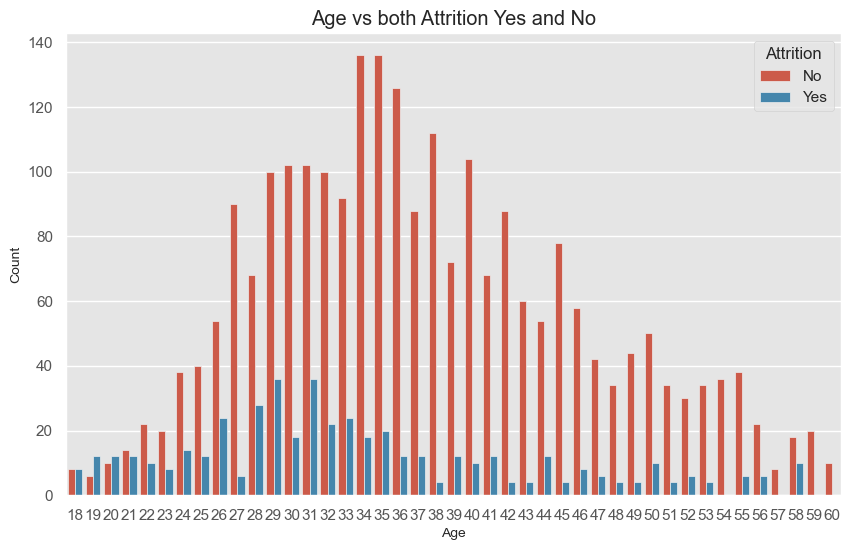

In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='Age', hue='Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs both Attrition Yes and No')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## Department vs Attrition

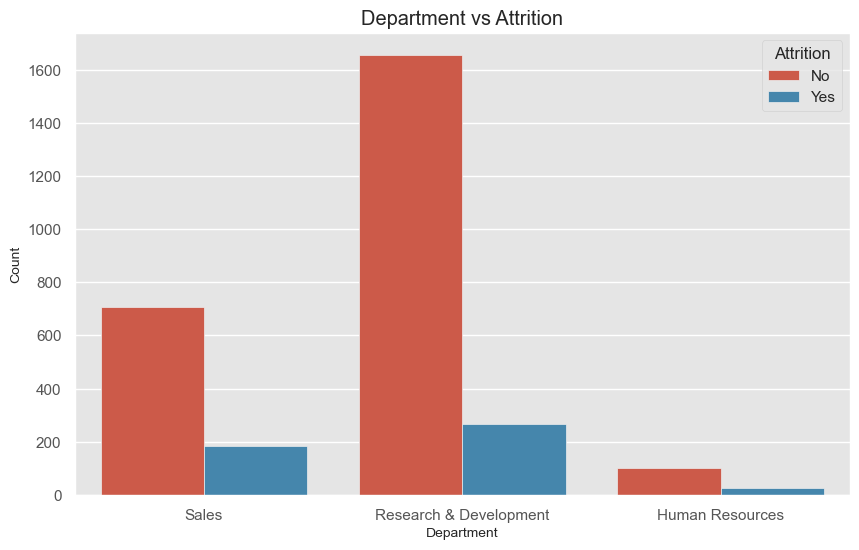

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='Department', hue='Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

In [74]:
print(hr_data['Department'].unique())

['Sales' 'Research & Development' 'Human Resources']


## TotalWorkingYears vs Attrition

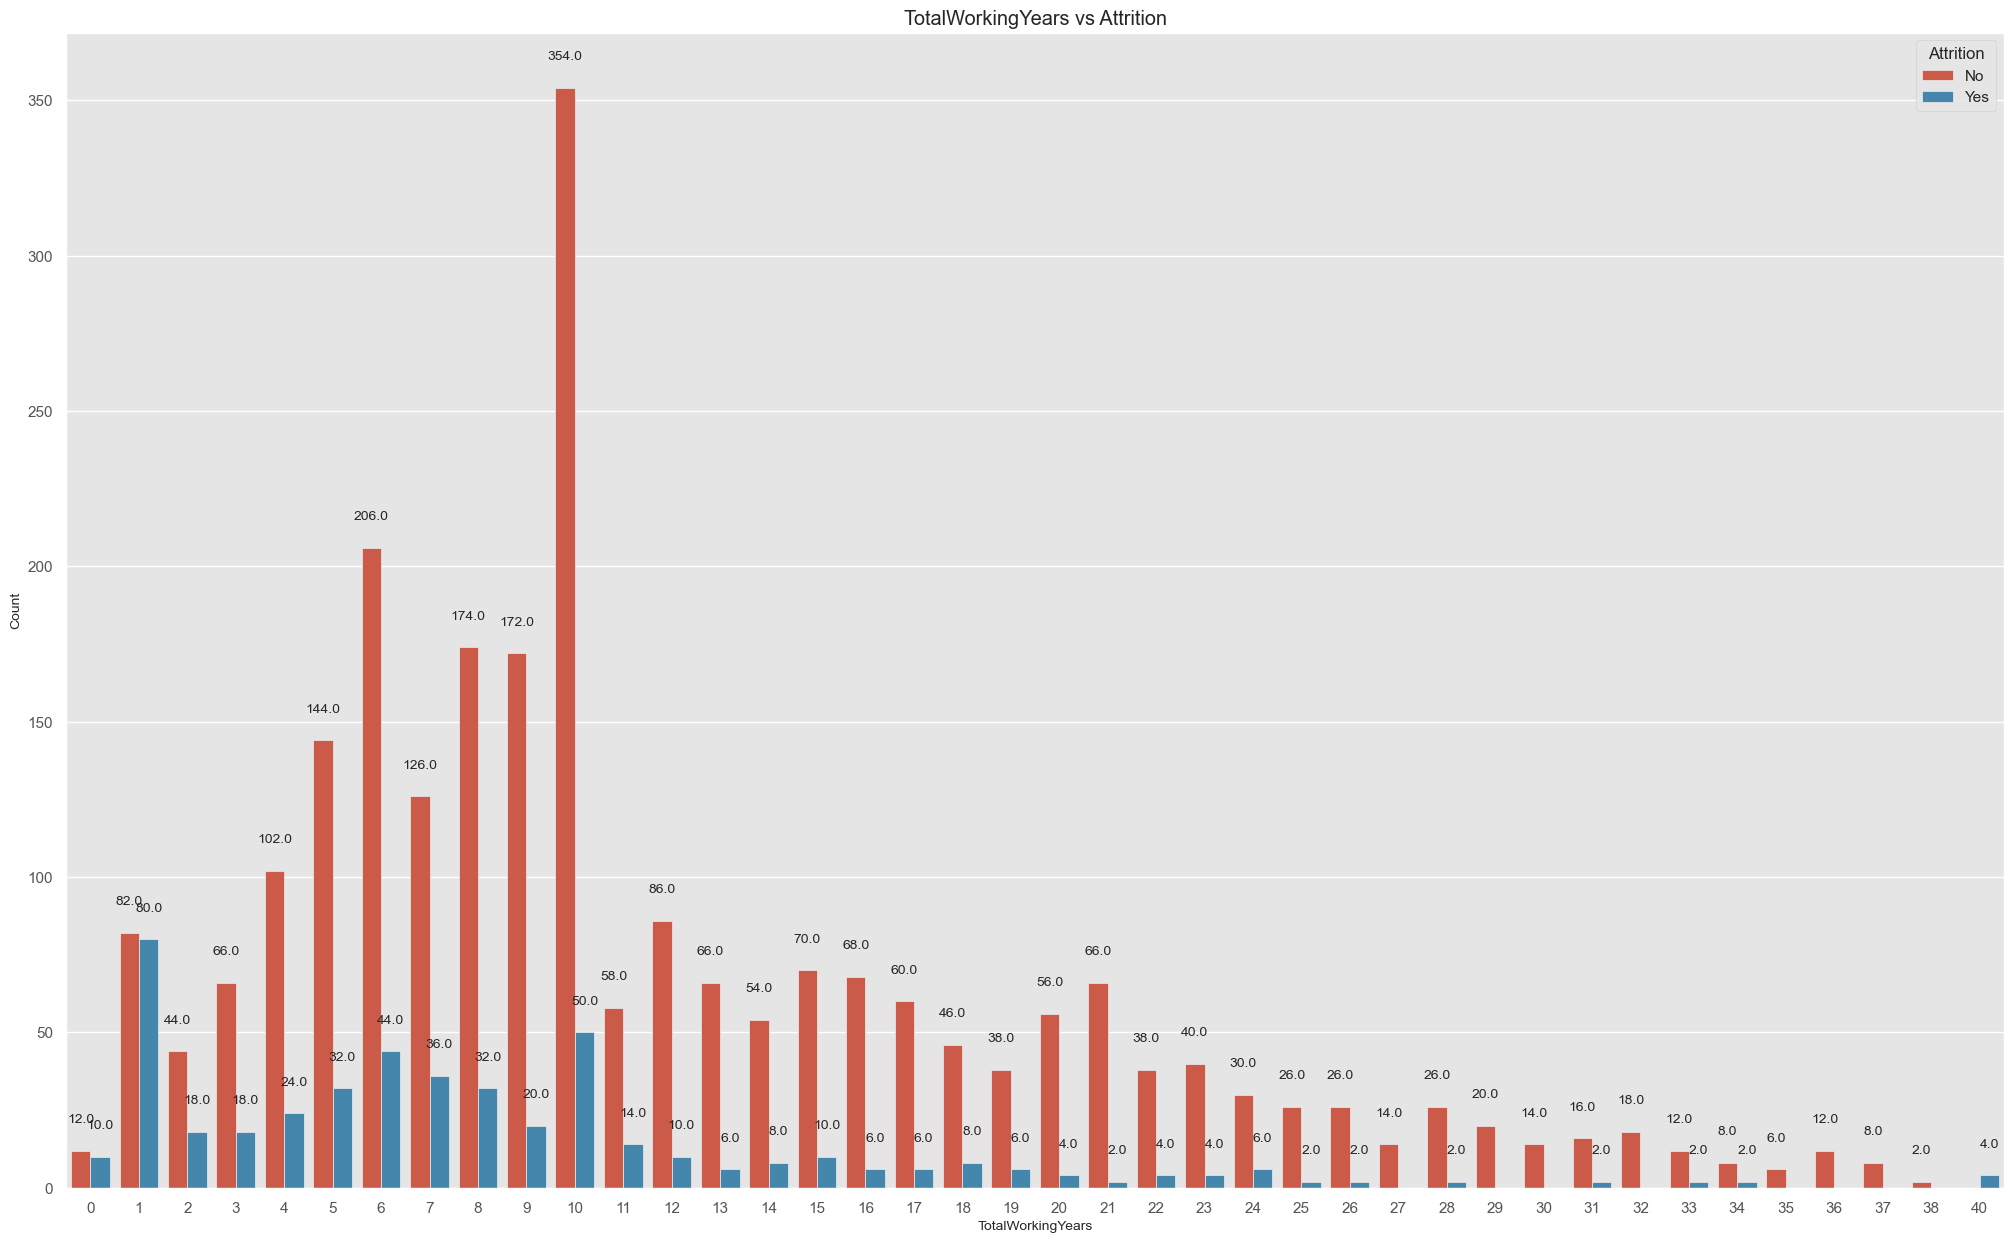

In [75]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(data=hr_data, x='TotalWorkingYears', hue='Attrition')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.title('TotalWorkingYears vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Annotate each bar with its count
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height() + 10), ha='center', va='center')
plt.show()

In [76]:
hr_data.PercentSalaryHike

EmployeeNumber
1       11
2       23
3       15
4       11
5       12
        ..
2936    17
2937    15
2938    20
2939    14
2940    12
Name: PercentSalaryHike, Length: 2940, dtype: int64

## PercentSalaryHike vs Attrition

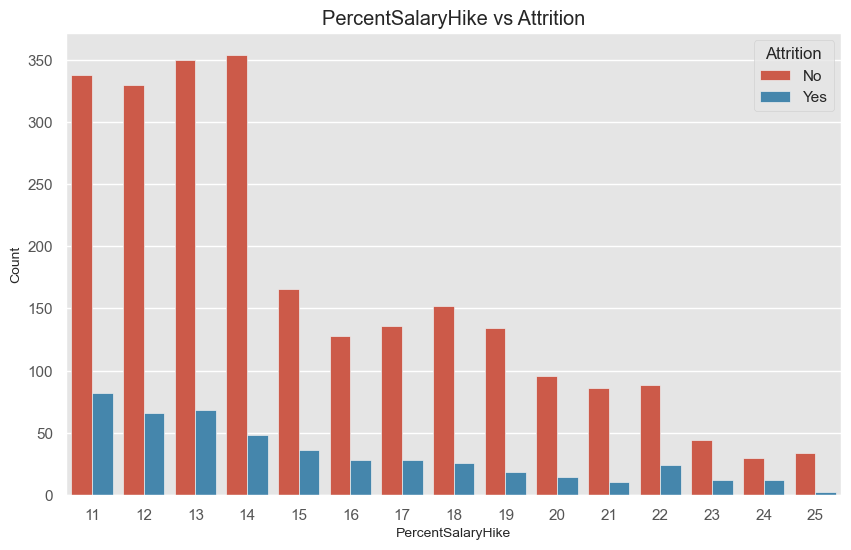

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='PercentSalaryHike', hue='Attrition')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Count')
plt.title('PercentSalaryHike vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## Gender vs Attrition

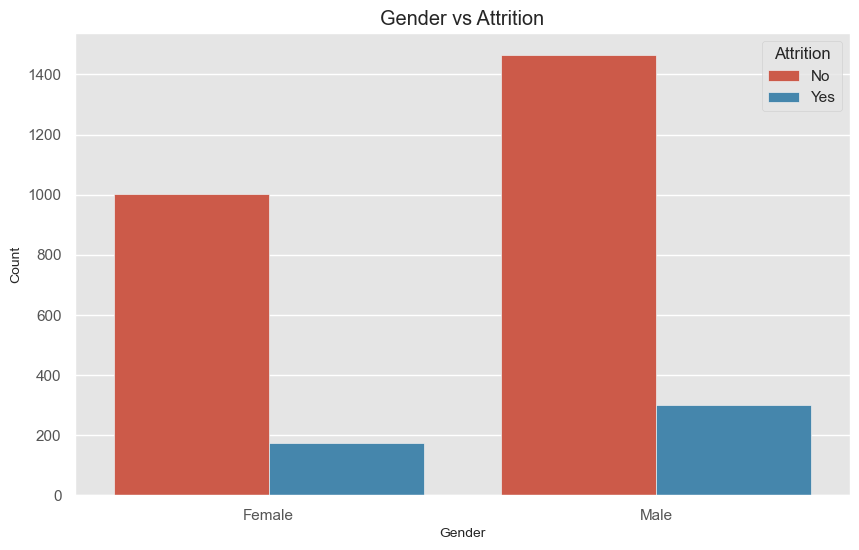

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='Gender', hue='Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## MaritalStatus vs Attrition

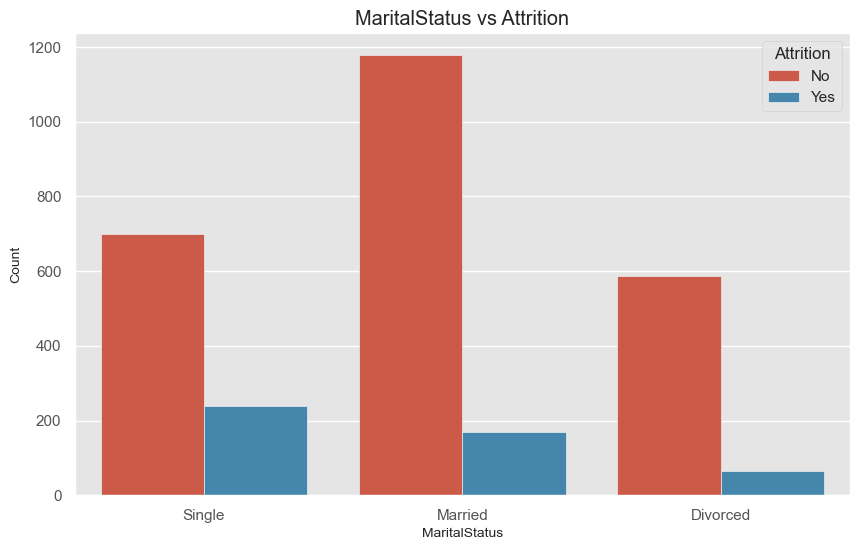

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='MaritalStatus', hue='Attrition')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('MaritalStatus vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## JobLevel vs Attrition

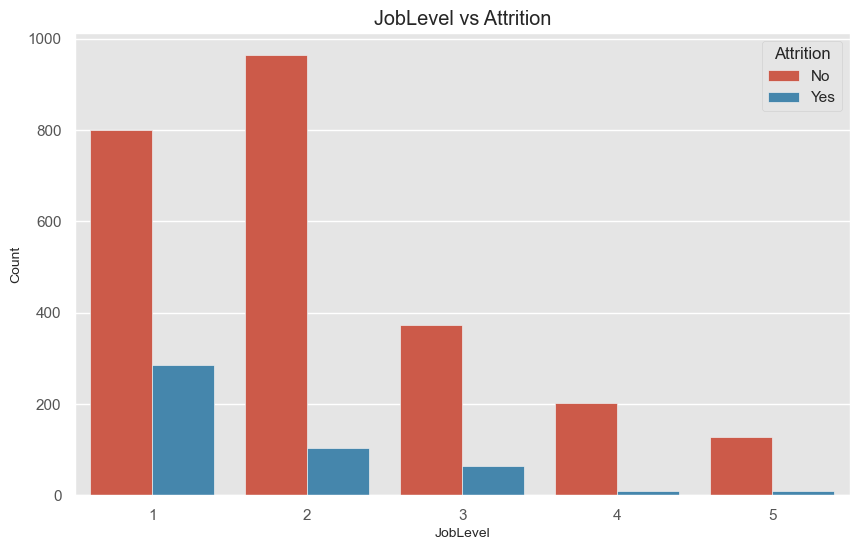

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='JobLevel', hue='Attrition')
plt.xlabel('JobLevel')
plt.ylabel('Count')
plt.title('JobLevel vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## YearsAtCompany vs Attrition

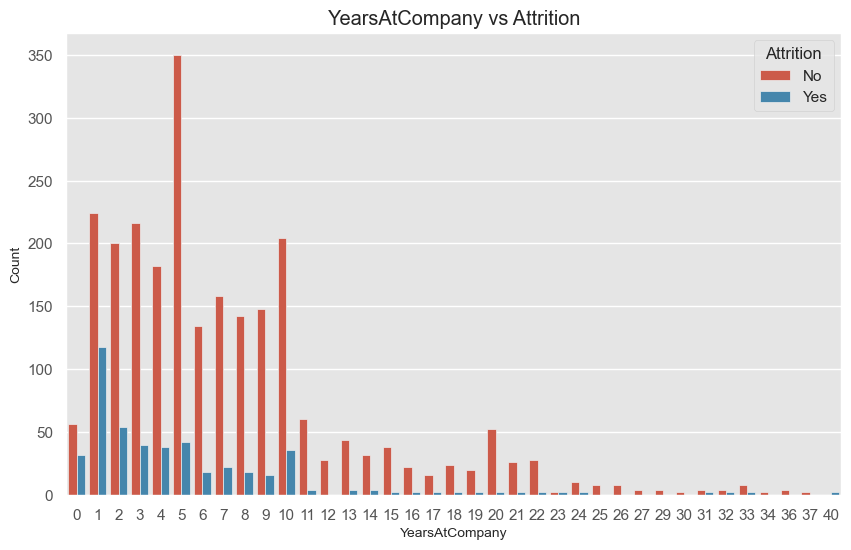

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='YearsAtCompany', hue='Attrition')
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')
plt.title('YearsAtCompany vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## JobSatisfaction vs Attrition

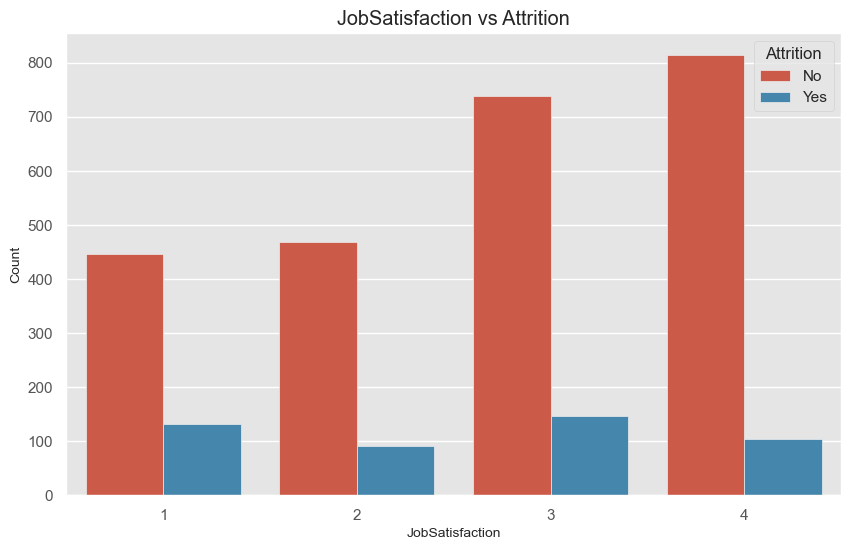

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='JobSatisfaction', hue='Attrition')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.title('JobSatisfaction vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## EducationField vs Attrition 

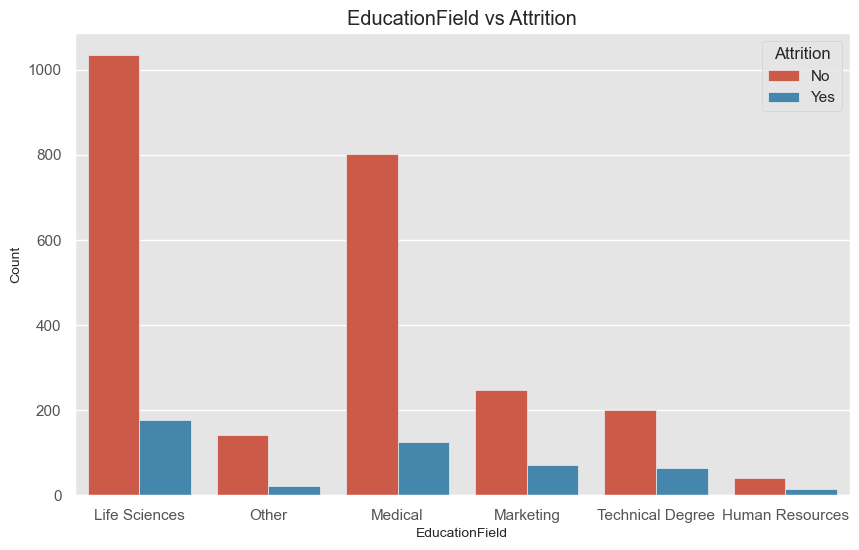

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='EducationField', hue='Attrition')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.title('EducationField vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## BusinessTravel vs Attrition

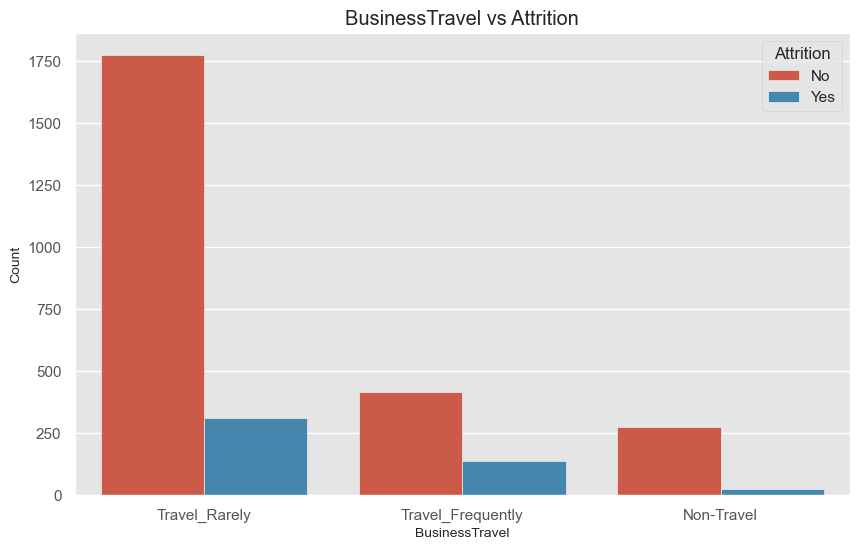

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='BusinessTravel', hue='Attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.title('BusinessTravel vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## JobLevel vs Attrition

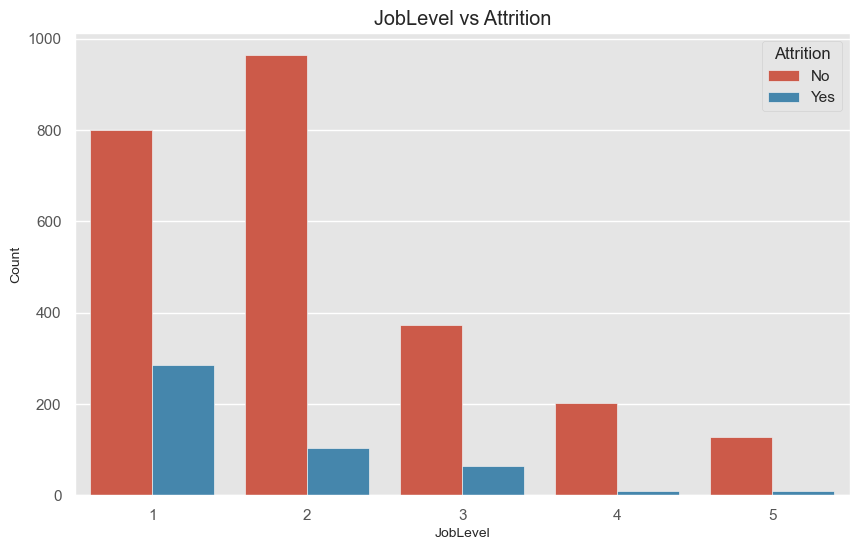

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='JobLevel', hue='Attrition')
plt.xlabel('JobLevel')
plt.ylabel('Count')
plt.title('JobLevel vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## OverTime vs Attrition

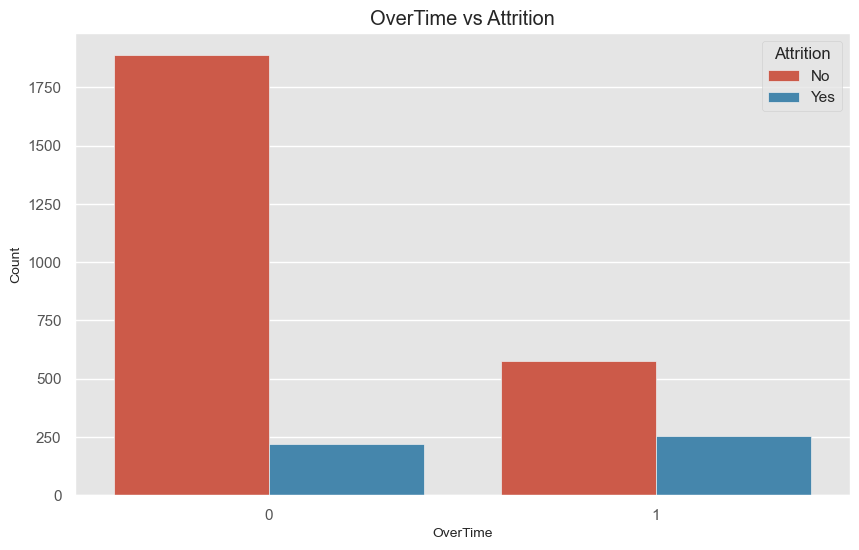

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='OverTime', hue='Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('OverTime vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## YearsSinceLastPromotion vs Attrition

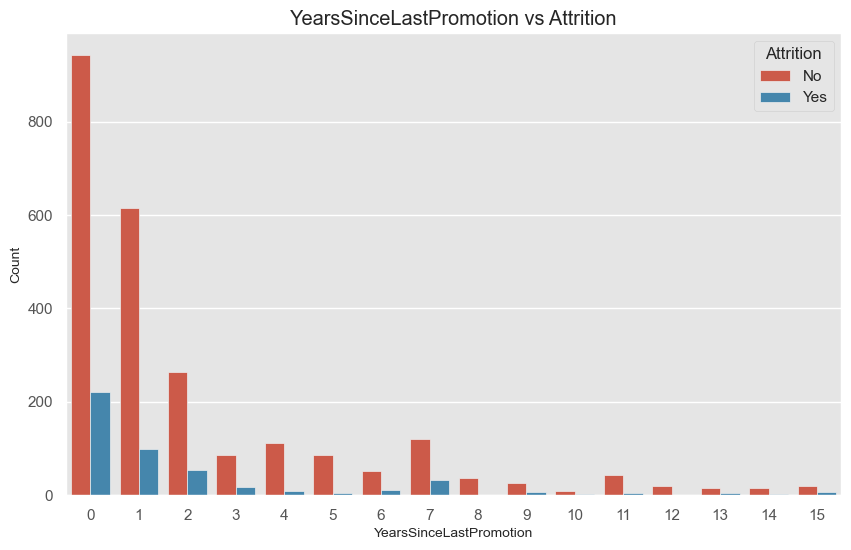

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='YearsSinceLastPromotion', hue='Attrition')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Count')
plt.title('YearsSinceLastPromotion vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## YearsWithCurrManager vs Attrition

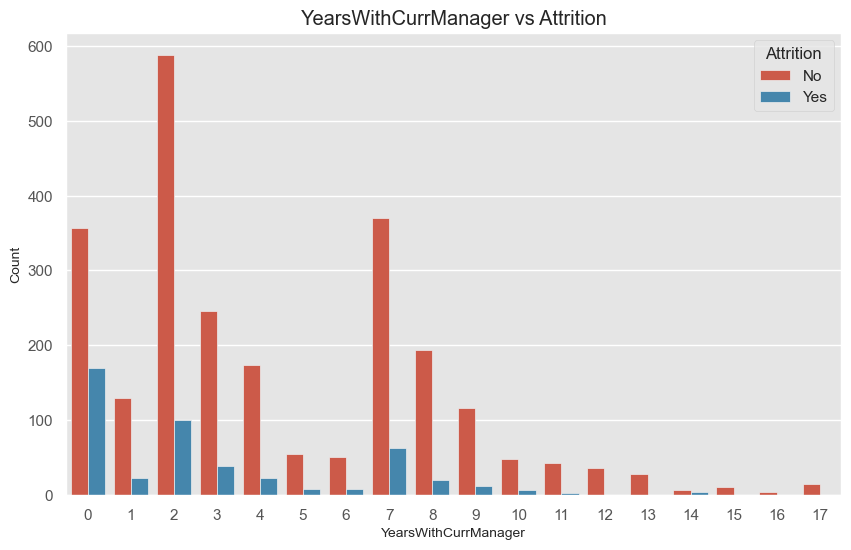

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_data, x='YearsWithCurrManager', hue='Attrition')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Count')
plt.title('YearsWithCurrManager vs Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

## Monthly Income vs Attrition

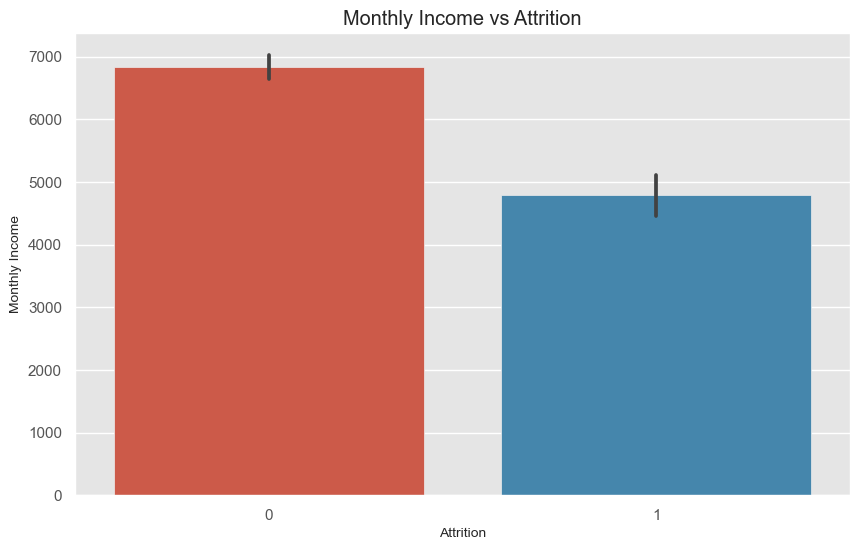

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hr_data, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

## insights from the data about the important factors associated with the attrition,

# From my findings in data, I like to add some points as the reason for attrition
## --->Majority of Low Monthly Income peoples are quited there job,
## --->Peoples from age 28-34 are more to quit the jobs,
## --->More Peoples from Research & Development Are quit the jobs
# --->Peoples having low TotalWorkingYears are more quit the jobs
# --->Peoples having less PercentSalaryHike are more quit the job
# --->people who had 1 YearsAtCompany had more to quit the jobs
# --->Peoples who are in 1st JobLevel that is entry level are more to quit
# --->people come from education background Life_Science are more to quit the jobs
# --->People in 0 YearsSinceLastPromotion are more to quit the jobs
# --->people who are travel rarely are more to quit the jobs
# --->More male and Singles are more to quit the jobs
# --->Peoples who are 0 YearsWithCurrManager are more to quit the jobs

In [90]:
# Here I am using one-hot encoding method, As these values are categorical, So I am assigning values to each column
hr_data = pd.get_dummies(hr_data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [102]:
hr_data = hr_data.astype(int)
hr_data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2937,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2938,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


## Checking whether all the datatypes are int

In [103]:
print("Here's the dimensions of our data frame:\n", hr_data.shape)
print("Here's the data types of our columns:\n",hr_data.dtypes)

Here's the dimensions of our data frame:
 (2940, 51)
Here's the data types of our columns:
 Age                                  int32
Attrition                            int32
DailyRate                            int32
DistanceFromHome                     int32
Education                            int32
EnvironmentSatisfaction              int32
HourlyRate                           int32
JobInvolvement                       int32
JobLevel                             int32
JobSatisfaction                      int32
MonthlyIncome                        int32
MonthlyRate                          int32
NumCompaniesWorked                   int32
OverTime                             int32
PercentSalaryHike                    int32
PerformanceRating                    int32
RelationshipSatisfaction             int32
StockOptionLevel                     int32
TotalWorkingYears                    int32
TrainingTimesLastYear                int32
WorkLifeBalance                      int32
Years

In [141]:
hr_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.400000,0.600000,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.133819,0.367800,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,0.450530,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529,0.302753,0.391126,0.454059,0.202569,0.475858,0.459805,0.134299,0.492323,0.310639,0.464852,0.229540,0.285938,0.489981,0.489981,0.284959,0.184755,0.381047,0.254156,0.298228,0.226887,0.399044,0.415507,0.230852,0.415962,0.498303,0.466450
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

# Split the Dataset for Training & Testing

In [93]:
feature_space = hr_data.iloc[:, hr_data.columns != 'Attrition']
feature_class = hr_data.iloc[:, hr_data.columns == 'Attrition']


training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)

In [94]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel() 

## Random_forest

In [107]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV

In [97]:
# By Using hit and try method, Checked with different max_depth values from 2 to 20
# 14 is fitting correctly for my model
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [14,15],
              'bootstrap': [True, False],
              'max_features': [ 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt'}
Time taken in grid search:  206.34


In [105]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'sqrt', 
                  max_depth = 14)

RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=15,
                       oob_score=True, random_state=42, warm_start=True)

## OOB Rate

In [108]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [109]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [110]:
oob_series

15      0.054422
16      0.053997
17      0.054422
18      0.053997
19      0.052296
          ...   
996     0.027211
997     0.027211
998     0.027211
999     0.027211
1000    0.027211
Length: 986, dtype: float64

In [111]:
# checking for least OBB error
min_tree = oob_series.idxmin()
print("Tree with the minimum OOB error rate is at index:", min_tree)

Tree with the minimum OOB error rate is at index: 381


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

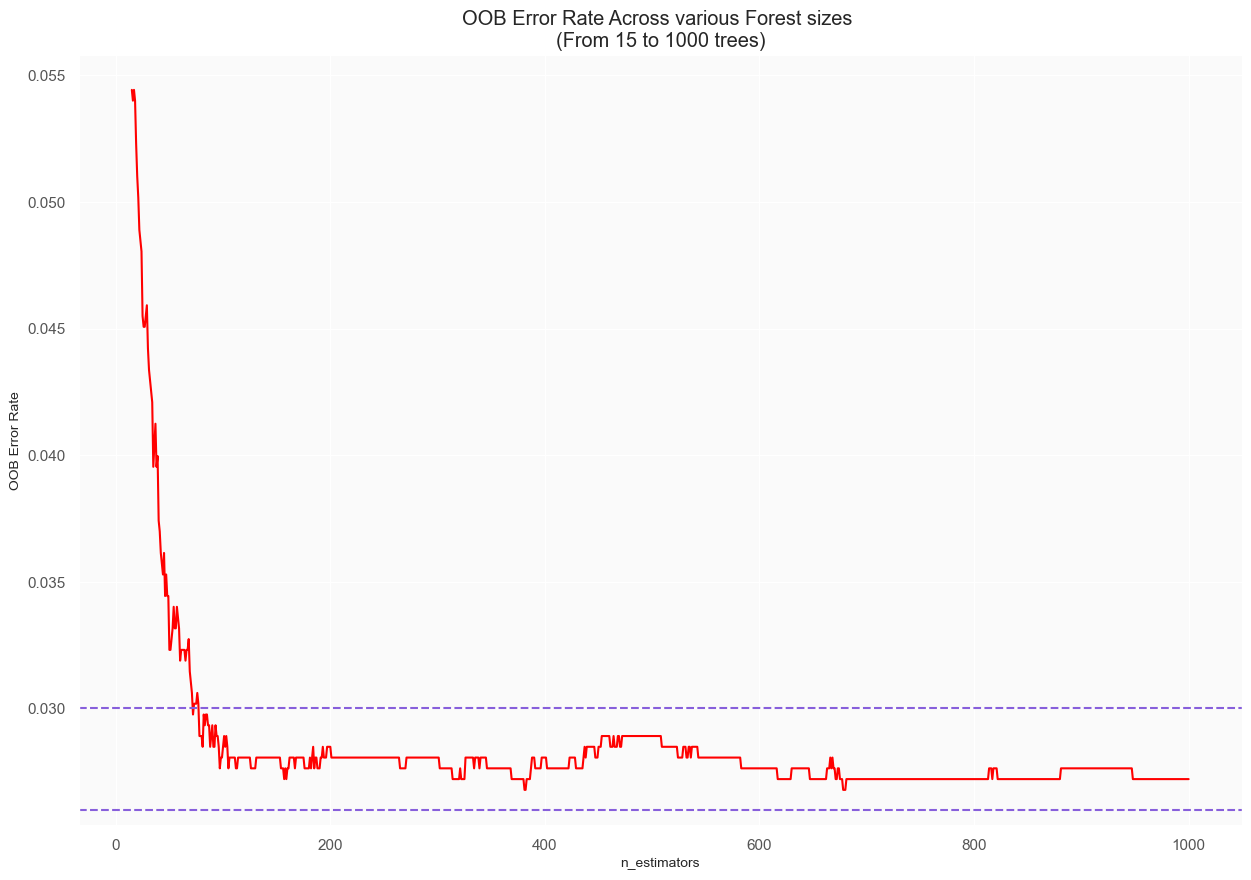

In [120]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.030, color='#875FDB',linestyle='--')
plt.axhline(0.026, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [112]:
print('OOB Error rate for 381 trees is: {0:.5f}'.format(oob_series[381]))

OOB Error rate for 381 trees is: 0.02679


In [121]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=381,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=381, random_state=42)

## Train the RandomForest

In [122]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(n_estimators=381, random_state=42)

## Variable Importance

In [123]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [124]:
names_index = feature_space.columns


In [125]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [126]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [127]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.07406
2. The feature 'Age' has a Mean Decrease in Impurity of 0.05645
3. The feature 'OverTime' has a Mean Decrease in Impurity of 0.05308
4. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.05185
5. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.04968
6. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.04950
7. The feature 'TotalWorkingYears' has a Mean Decrease in Impurity of 0.04885
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.04522
9. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.03752
10. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.03403
11. The feature 'PercentSalaryHike' has a Mean Decrease in Impurity of 0.03357
12. The feature 'YearsWithCurrManager' has a Mean Decrease in Impurity of 0.03048
13. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.02908
14. The

In [128]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model for HR Attrition ')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

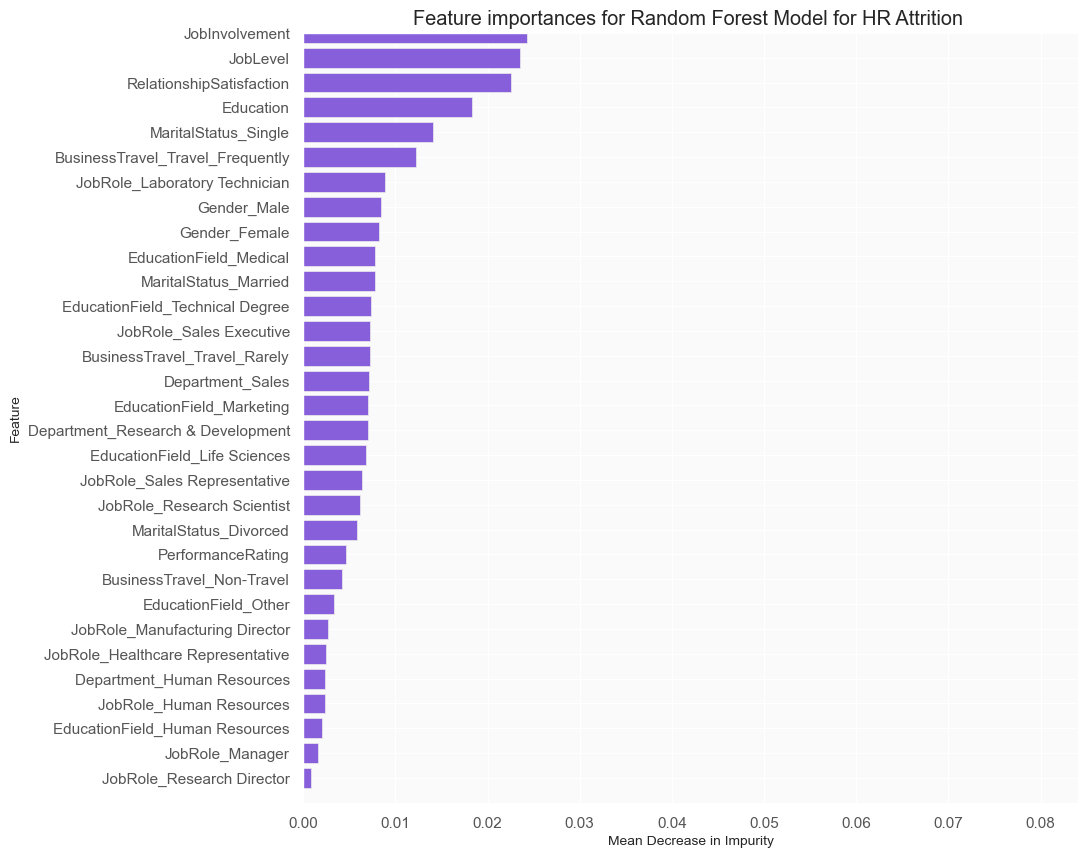

In [129]:
variable_importance_plot(importances_rf, indices_rf, names_index)

## Predictions

In [130]:
predictions_rf = fit_rf.predict(test_set)

## Confusion Matrix

In [131]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

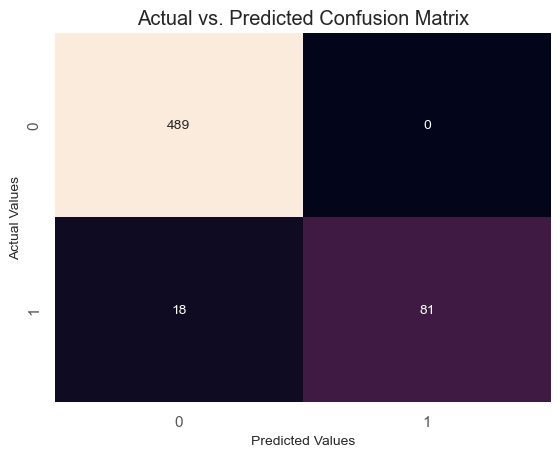

In [132]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Accuracy

In [133]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.969


## Error Rate

In [134]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0306


## Area Under Curve (AUC)

In [135]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)

In [136]:
auc_rf = auc(fpr2, tpr2)

In [137]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\jitht\AppData\Local\Temp\ipykernel_6624\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\jitht\AppData\Local\Temp\ipykernel_6624\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


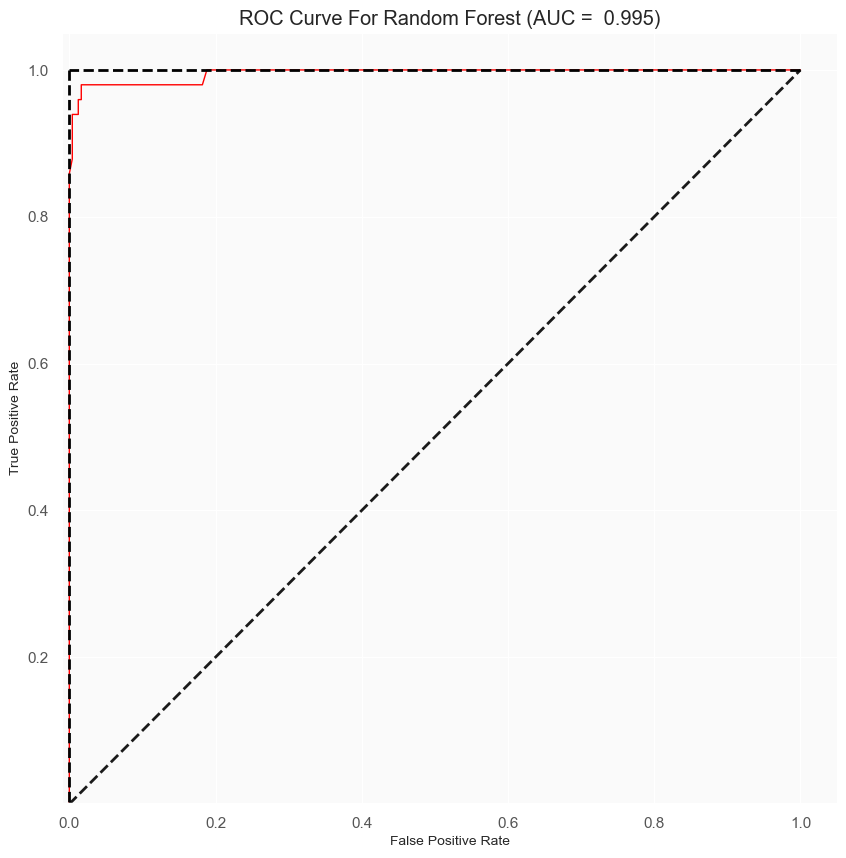

In [138]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification Report

In [139]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            test_class_set, 
            target_names = dx))

In [140]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

         Yes       1.00      0.96      0.98       507
          No       0.82      1.00      0.90        81

    accuracy                           0.97       588
   macro avg       0.91      0.98      0.94       588
weighted avg       0.97      0.97      0.97       588

